In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [110]:
#Use this to check if you can eliminate certain months
#powerOutages = pd.DataFrame(df.loc[:,['DATE','Power Outage']]);
#plt.plot_date(powerOutages['DATE'],powerOutages['Power Outage']);
# plt.show()

In [111]:
df = pd.read_csv('Final Data');
df.head()

,PRCP,TMAX,5 second wind speed squared,2 min wind speed squared,Avg Wind Speed Squared,Fog/Ice,Heavy/Freezing Fog,Thunder,Smoke/Haze,Power Outage
0,0.024027,0.638747,0.009206,0.010812,0.034255,0.521739,1.521739e-01,6.521739e-02,1.739130e-01,0.0
1,0.000000,0.764706,0.507675,0.011893,0.002474,1.000000,1.000000e+00,2.775558e-17,1.000000e+00,0.0
2,0.007368,0.864706,0.206135,0.073630,0.099192,0.600000,2.000000e-01,2.775558e-17,4.000000e-01,0.0
3,0.000000,0.764706,0.957100,0.202051,0.017456,0.000000,2.775558e-17,2.775558e-17,2.775558e-17,0.0
4,0.150000,0.554902,0.036995,0.087547,0.221798,0.400000,1.387779e-17,2.000000e-01,2.000000e-01,0.0


In [112]:
import numpy as np
from sklearn.cross_validation import train_test_split
df.shape

(318, 10)

In [113]:
#Split the data into X and Y, and then into training and testing sets
X = np.array(df[['2 min wind speed squared','Avg Wind Speed Squared','5 second wind speed squared','Fog/Ice','Heavy/Freezing Fog','Thunder']]);
y = np.array(df['Power Outage']);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 20);

In [114]:
#Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [115]:
knn = KNeighborsClassifier(n_neighbors=3, weights= "distance")

In [116]:
knn.fit(X_train, y_train);

In [117]:
pred = knn.predict(X_test);

In [118]:
accuracy = accuracy_score(y_test, pred);

In [119]:
print("Accuracy: ", accuracy);
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, pred, [0, 1])
print(con_mat)

Accuracy:  0.92380952381
[[45  8]
 [ 0 52]]


In [120]:
#Calculate how many Power outages were predicted correctly
actualOutage = set(np.nonzero(y_test)[0]);
predictedOutage = set(np.nonzero(pred)[0]);
accuratePrediction = predictedOutage.intersection(actualOutage);
if len(accuratePrediction)>len(actualOutage):
    accuracyPredictionPercentage = 100;
else:
    accuracyPredictionPercentage = len(accuratePrediction)/len(actualOutage)*100;
print("Out of the number of actual ones, it predicted : ", accuracyPredictionPercentage);


Out of the number of actual ones, it predicted :  100.0


In [121]:
#Calculate how many days were classified as normal days
noOutage = set(np.where(y_test == 0)[0])
predictedNoOutage = set(np.where(pred == 0)[0])
accuratePredictionNoOutage = predictedNoOutage.intersection(noOutage);
if len(accuratePredictionNoOutage)>len(noOutage):
    accuratePredictionNoOutagePercentage = 100
else:
    accuratePredictionNoOutagePercentage = len(accuratePredictionNoOutage)/len(noOutage)*100;
print("Out of the number of normal days, it predicted : ", accuratePredictionNoOutagePercentage);

Out of the number of normal days, it predicted :  84.90566037735849


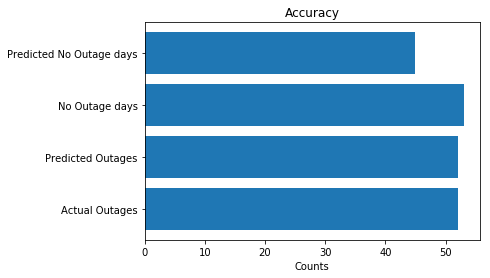

In [122]:
#Plot graphs of accuracy
plt.barh([1,2,3,4], [len(actualOutage),len(accuratePrediction),len(noOutage),len(accuratePredictionNoOutage)]);
plt.yticks([1,2,3,4],['Actual Outages','Predicted Outages','No Outage days','Predicted No Outage days'])
plt.xlabel('Counts');
plt.title('Accuracy');
plt.show()

In [123]:
checkKValue = list(range(1,50))
neighbors = list(filter(lambda x: x % 2 !=0, checkKValue))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [124]:
MSE = [1-x for x in cv_scores]
optimalK = neighbors[MSE.index(min(MSE))]
print("Optimal K value is : ", optimalK);
print("Misclassification error at that value is ", min(MSE));

Optimal K value is :  5
Misclassification error at that value is  0.0611255411255


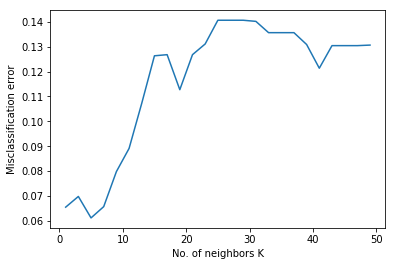

In [125]:
plt.plot(neighbors, MSE)
plt.xlabel('No. of neighbors K')
plt.ylabel('Misclassification error')
plt.show()

In [126]:
#Indiana prediction based on Michigan Weather
#Split the data into X and Y, and then into training and testing sets
indiana=pd.read_csv('Indiana data');
X = np.array(df[['Avg Wind Speed Squared','5 second wind speed squared','2 min wind speed squared','Fog/Ice','Thunder']]);
X_test = np.array(indiana[['Avg Wind Speed Squared','5 second wind speed squared','2 min wind speed squared','Fog/Ice fog','Thunder']]);
y = np.array(df['Power Outage']);
y_test = np.array(indiana['Power Outage']);
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y);
pred = knn.predict(X_test);
accuracy = accuracy_score(y_test, pred);
print("Accuracy: ", accuracy);

Accuracy:  0.911764705882


In [127]:
#Calculate how many Power outages were predicted correctly
actualOutage = set(np.nonzero(y_test)[0]);
predictedOutage = set(np.nonzero(pred)[0]);
accuratePrediction = predictedOutage.intersection(actualOutage);
if len(accuratePrediction)>len(actualOutage):
    accuracyPredictionPercentage = 100;
else:
    accuracyPredictionPercentage = len(accuratePrediction)/len(actualOutage)*100;
print("Out of the number of actual ones, it predicted : ", accuracyPredictionPercentage);


Out of the number of actual ones, it predicted :  88.23529411764706


In [128]:
#Calculate how many days were classified as normal days
noOutage = set(np.where(y_test == 0)[0])
predictedNoOutage = set(np.where(pred == 0)[0])
accuratePredictionNoOutage = predictedNoOutage.intersection(noOutage);
if len(accuratePredictionNoOutage)>len(noOutage):
    accuratePredictionNoOutagePercentage = 100
else:
    accuratePredictionNoOutagePercentage = len(accuratePredictionNoOutage)/len(noOutage)*100;
print("Out of the number of normal days, it predicted : ", accuratePredictionNoOutagePercentage);

Out of the number of normal days, it predicted :  94.11764705882352


In [129]:
#Now find how well was the data undersampled using clustering
raw_data = pd.read_csv('data.csv');
raw_data = raw_data.fillna(0);
raw_data['Avg Wind Speed Squared'] = pd.Series(np.square(raw_data['Average Wind Speed']));
raw_data['5 second wind speed squared'] = pd.Series(np.square(raw_data['Fastest 5 second wind speed']));
raw_data['2 min wind speed squared'] = pd.Series(np.square(raw_data['Fastest 2 minute wind speed']));
raw_data = raw_data.drop(['DATE','TMAX','TMIN','Smoke/Haze','Average Wind Speed','Fastest 5 second wind speed','Fastest 2 minute wind speed'], axis=1);
#Normalize data
scaledData = preprocessing.MinMaxScaler().fit_transform(raw_data.values);
raw_data = pd.DataFrame(scaledData, index = raw_data.index, columns = raw_data.columns);
raw_data.describe()

,PRCP,Fog/Ice,Heavy/Freezing Fog,Thunder,Power Outage,Avg Wind Speed Squared,5 second wind speed squared,2 min wind speed squared
count,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000
mean,0.019899,0.344674,0.100344,0.053265,0.054639,0.133314,0.031864,0.057726
std,0.056304,0.475343,0.300509,0.224599,0.227314,0.128751,0.071300,0.059636
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.045024,0.010548,0.028859
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.097886,0.016690,0.041951
75%,0.007500,1.000000,0.000000,0.000000,0.000000,0.180098,0.028260,0.069620
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
df.describe()

,PRCP,TMAX,5 second wind speed squared,2 min wind speed squared,Avg Wind Speed Squared,Fog/Ice,Heavy/Freezing Fog,Thunder,Smoke/Haze,Power Outage
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,3.180000e+02,3.180000e+02,3.180000e+02,318.000000
mean,0.075122,0.619488,0.109774,0.108352,0.174002,0.511540,1.503688e-01,1.317914e-01,2.098480e-01,0.500000
std,0.148938,0.205566,0.185419,0.136324,0.186327,0.442045,3.122838e-01,3.110567e-01,3.568476e-01,0.500788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.450980,0.015994,0.032261,0.054280,0.000000,2.775558e-17,2.775558e-17,2.775558e-17,0.000000
50%,0.011662,0.663501,0.036915,0.067961,0.108732,0.419872,2.775558e-17,2.775558e-17,2.775558e-17,0.500000
75%,0.072998,0.779412,0.109737,0.130270,0.220255,1.000000,1.073059e-01,2.895067e-02,2.000000e-01,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000


In [131]:
y_test = raw_data['Power Outage'];
raw_data=raw_data[['Avg Wind Speed Squared','2 min wind speed squared','5 second wind speed squared','Fog/Ice','Thunder']];
X = df[['Avg Wind Speed Squared','2 min wind speed squared','5 second wind speed squared','Fog/Ice','Thunder']];
X_test = raw_data;
X_test.head()

,Avg Wind Speed Squared,2 min wind speed squared,5 second wind speed squared,Fog/Ice,Thunder
0,0.036815,0.014808,0.005809,0.0,0.0
1,0.154984,0.057484,0.019600,0.0,0.0
2,0.104491,0.037627,0.011571,0.0,0.0
3,0.019968,0.009524,0.003535,1.0,0.0
4,0.049338,0.041951,0.012885,0.0,0.0


In [132]:
knn = KNeighborsClassifier(n_neighbors=10, weights="distance")
knn.fit(X,y);
pred = knn.predict(X_test);
accuracy = accuracy_score(y_test, pred);
print("Accuracy: ", accuracy);


Accuracy:  0.0927835051546


In [133]:
#Calculate how many Power outages were predicted correctly
actualOutage = set(np.nonzero(y_test)[0]);
predictedOutage = set(np.nonzero(pred)[0]);
accuratePrediction = predictedOutage.intersection(actualOutage);
if len(accuratePrediction)>len(actualOutage):
    accuracyPredictionPercentage = 100;
else:
    accuracyPredictionPercentage = len(accuratePrediction)/len(actualOutage)*100;
print("Out of the number of actual ones, it predicted : ", accuracyPredictionPercentage);


Out of the number of actual ones, it predicted :  100.0


In [134]:
#Calculate how many days were classified as normal days
noOutage = set(np.where(y_test == 0)[0])
predictedNoOutage = set(np.where(pred == 0)[0])
accuratePredictionNoOutage = predictedNoOutage.intersection(noOutage);
if len(accuratePredictionNoOutage)>len(noOutage):
    accuratePredictionNoOutagePercentage = 100
else:
    accuratePredictionNoOutagePercentage = len(accuratePredictionNoOutage)/len(noOutage)*100;
print("Out of the number of normal days, it predicted : ", accuratePredictionNoOutagePercentage);

Out of the number of normal days, it predicted :  4.0348964013086155
